<h1 style='font-size: 45px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'>Analysis of Variance (ANOVA) | Comparing Group Differences for Better Decisions</h1>

---

<h2 style=' font-weight: 600; font-size: 20px; text-align: left'>1.0. Import Required Libraries</h2>

In [2]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from scipy.stats import shapiro, levene
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import re

pd.set_option('display.max_columns', 70) 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("....Libraries Loaded Successfully....")

....Libraries Loaded Successfully....


<h2 style='font-weight: 600; font-size: 20px; text-align: left'>2.0. Load and Inspect Dataset</h2>

In [15]:
filepath = "Datasets/Fertilizer Experiment.csv"
df = pd.read_csv(filepath)
display(df)

,Fertilizer,Light Exposure,Plant Height (cm),Leaf Area (cm²),Chlorophyll Content (SPAD units),Root Length (cm),Biomass (g),Flower Count (number),Seed Yield (g),Stomatal Conductance (mmol/m²/s)
0,Control,Full Sun,58.56,185.74,46.52,24.32,11.99,19.54,6.69,242.41
1,Organic,Full Shade,46.70,138.80,34.69,17.66,8.67,15.37,6.17,233.66
2,Control,Partial Shade,58.33,203.84,40.82,27.00,9.50,16.39,5.41,230.07
3,Control,Full Shade,42.73,140.47,29.07,19.59,10.35,12.45,4.26,154.25
4,Organic,Full Shade,41.82,129.78,34.73,19.78,10.55,15.14,4.64,200.54
...,...,...,...,...,...,...,...,...,...,...
115,Synthetic,Partial Shade,65.24,228.35,41.79,23.97,10.94,21.14,7.48,254.78
116,Organic,Partial Shade,63.56,179.53,35.55,26.30,10.47,16.11,6.17,234.22
117,Control,Partial Shade,62.75,180.21,41.25,26.23,12.41,17.99,6.18,278.97
118,Control,Full Shade,39.60,144.32,29.12,18.74,9.15,13.72,4.46,186.87


<h2 style='font-size: 20px; font-weight: 600'>3.0: Dataset Informartion Overviews</h2>


In [4]:
df.shape

(120, 10)

In [5]:
for column in df.columns.tolist(): print(f"{'-'*15} {column}")

--------------- Fertilizer
--------------- Light Exposure
--------------- Plant Height (cm)
--------------- Leaf Area (cm²)
--------------- Chlorophyll Content (SPAD units)
--------------- Root Length (cm)
--------------- Biomass (g)
--------------- Flower Count (number)
--------------- Seed Yield (g)
--------------- Stomatal Conductance (mmol/m²/s)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fertilizer                        120 non-null    object 
 1   Light Exposure                    120 non-null    object 
 2   Plant Height (cm)                 120 non-null    float64
 3   Leaf Area (cm²)                   120 non-null    float64
 4   Chlorophyll Content (SPAD units)  120 non-null    float64
 5   Root Length (cm)                  120 non-null    float64
 6   Biomass (g)                       120 non-null    float64
 7   Flower Count (number)             120 non-null    float64
 8   Seed Yield (g)                    120 non-null    float64
 9   Stomatal Conductance (mmol/m²/s)  120 non-null    float64
dtypes: float64(8), object(2)
memory usage: 9.5+ KB


In [8]:
# Columns Summary
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Fertilizer,object,0,120,3,"{'Control': 41, 'Synthetic': 40, 'Organic': 39}"
1,Light Exposure,object,0,120,3,"{'Full Shade': 44, 'Full Sun': 40, 'Partial Sh..."
2,Plant Height (cm),float64,0,120,120,"{58.56151388665052: 1, 46.696826238466286: 1, ..."
3,Leaf Area (cm²),float64,0,120,120,"{185.73856643236132: 1, 138.7980608962804: 1, ..."
4,Chlorophyll Content (SPAD units),float64,0,120,120,"{46.5196207922374: 1, 34.69363266870892: 1, 40..."
5,Root Length (cm),float64,0,120,120,"{24.31891050096943: 1, 17.6585349528435: 1, 26..."
6,Biomass (g),float64,0,120,120,"{11.994074041165357: 1, 8.667791843721698: 1, ..."
7,Flower Count (number),float64,0,120,120,"{19.53594616947752: 1, 15.366158832462084: 1, ..."
8,Seed Yield (g),float64,0,120,120,"{6.687959618540082: 1, 6.165373569255893: 1, 5..."
9,Stomatal Conductance (mmol/m²/s),float64,0,120,120,"{242.41380014645895: 1, 233.65862057163417: 1,..."


In [10]:
# Exploring Invalid Entries Dtypes
def simplify_dtype(dtype):
    if dtype in (int, float, np.number): return 'Numeric'
    elif np.issubdtype(dtype, np.datetime64): return 'Datetime'
    elif dtype == str: return 'String'
    elif dtype == type(None): return 'Missing'
    else: return 'Other'

def analyze_column_dtypes(df):
    all_dtypes = {'Numeric', 'Datetime', 'String', 'Missing', 'Other'}
    results = pd.DataFrame(index=df.columns, columns=list(all_dtypes), dtype=object).fillna('-')
    
    for column in df.columns:
        dtypes = df[column].apply(lambda x: simplify_dtype(type(x))).value_counts()
        percentages = (dtypes / len(df)) * 100
        for dtype, percent in percentages.items():
            if percent > 0:
                results.at[column, dtype] = f'{percent:.2f}%'  # Add % sign and format to 2 decimal places
            else:
                results.at[column, dtype] = '-'  # Add dash for 0%
    return results

results = analyze_column_dtypes(df)
display(results)

,Datetime,String,Missing,Numeric,Other
Fertilizer,-,100.00%,-,-,-
Light Exposure,-,100.00%,-,-,-
Plant Height (cm),-,-,-,100.00%,-
Leaf Area (cm²),-,-,-,100.00%,-
Chlorophyll Content (SPAD units),-,-,-,100.00%,-
Root Length (cm),-,-,-,100.00%,-
Biomass (g),-,-,-,100.00%,-
Flower Count (number),-,-,-,100.00%,-
Seed Yield (g),-,-,-,100.00%,-
Stomatal Conductance (mmol/m²/s),-,-,-,100.00%,-


<h2 style='font-size: 20px;  font-weight: 600'>5.0: Check ANOVA Assumption</h2>

<h3 style='font-size: 18px; font-weight: 600'>5.2: Normality Test | Normal Distribution</h3>

In [11]:
def Levene_test(df, group_cols, numeric_cols=None): 
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
        for g in group_cols:
            if g in numeric_cols:
                numeric_cols.remove(g)
    
    results = []
    for group_col in group_cols:
        for col in numeric_cols:
            grouped_data = [g[col].dropna().values for _, g in df.groupby(group_col)]
            if all(len(g) > 1 for g in grouped_data):  # Ensure each group has enough data
                levene_stat, levene_p = levene(*grouped_data)
                interpretation = '✔' if levene_p > 0.05 else '✖'
                #interpretation = 'Homoscedasticity' if levene_p > 0.05 else 'Heteroscedasticity'
                
            else:
                levene_stat, levene_p, interpretation = None, None, 'Insufficient data'
            
            results.append({
                'Group Column': group_col,
                'Variable': col,
                'Test Statistic': levene_stat,
                'P-Value': levene_p,
                'Interpretation': interpretation
            })
    
    return pd.DataFrame(results)

result_df = Levene_test(df, group_cols=['Fertilizer'])
display(result_df)

,Group Column,Variable,Test Statistic,P-Value,Interpretation
0,Fertilizer,Plant Height (cm),5.40,0.01,✖
1,Fertilizer,Leaf Area (cm²),7.77,0.00,✖
2,Fertilizer,Chlorophyll Content (SPAD units),3.92,0.02,✖
3,Fertilizer,Root Length (cm),4.07,0.02,✖
4,Fertilizer,Biomass (g),11.78,0.00,✖
5,Fertilizer,Flower Count (number),4.62,0.01,✖
6,Fertilizer,Seed Yield (g),3.21,0.04,✖
7,Fertilizer,Stomatal Conductance (mmol/m²/s),2.58,0.08,✔


<h3 style='font-size: 18px; font-weight: 600'>5.2: Normality Test | Normal Distribution</h3>

In [13]:
def rename(text): return re.sub(r'[^a-zA-Z]', "", text)
    
def ShapirowilkTest(data, numerical_cols,  group_col):
    renamed_group_col = rename(group_col)
    data = data.rename(columns={col: rename(col) for col in data.columns})
    
    if len(numerical_cols) == 0: raise ValueError("No numerical columns found in the DataFrame.")
    
    results = []
    for col in numerical_cols:
        column_name = rename(col)  
        formula = f"{column_name} ~ C({renamed_group_col})" 
        model = smf.ols(formula, data=data).fit()
        model_residual = model.resid
        
        stat, p_value = shapiro(model_residual)
        results.append({
            'Variable': col,
            'Statistic': stat,
            'P-Value': p_value,
            'Normality': 'Normally Distributed' if p_value > 0.05 else 'Not Normally Distributed'
        })
    
    results_df = pd.DataFrame(results)
    
    return results_df
    
numerical_vars = df.select_dtypes(include=[np.number]).columns.tolist()
shapiro_results = ShapirowilkTest(df, numerical_vars, group_col='Fertilizer')
display(shapiro_results)

,Variable,Statistic,P-Value,Normality
0,Plant Height (cm),0.96,0.00,Not Normally Distributed
1,Leaf Area (cm²),0.97,0.01,Not Normally Distributed
2,Chlorophyll Content (SPAD units),0.96,0.00,Not Normally Distributed
3,Root Length (cm),0.97,0.00,Not Normally Distributed
4,Biomass (g),0.98,0.06,Normally Distributed
5,Flower Count (number),0.96,0.00,Not Normally Distributed
6,Seed Yield (g),0.97,0.01,Not Normally Distributed
7,Stomatal Conductance (mmol/m²/s),0.97,0.01,Not Normally Distributed


<h4 style='font-size: 15px; font-weight: 600'>5.2.3: Normality of Variables Samples | Central Limit Theorem (CLT) in Action</h4>

In [18]:
def bootstrapping(df, column, num_samples=1000, sample_size=30):
    sample_means = []
    for _ in range(num_samples):
        sample = df[column].dropna().sample(n=sample_size, replace=True)
        sample_means.append(sample.mean())
    return sample_means

def perform_shapiro_wilk_test(dataframe, numerical_columns, group_col=None):
    if len(numerical_columns) == 0: raise ValueError("No numerical columns provided for testing.")
    test_results = []
    if group_col:
        for group, group_df in df.groupby(group_col):
            for column in numerical_columns:
                group_col_sample_means = bootstrapping(group_df, column)
                stat, p_value = shapiro(group_df[column])
                after_stat, after_p_value = shapiro(group_col_sample_means)
                test_results.append({
                    'Main-Group': group_col,
                    'Group': group,
                    'Variable': column,
                    'Statistic': stat,
                    'P-Value': p_value,
                    'Before CLT': '✔' if p_value > 0.05 else '❌',
                    'After CLT': '✔' if after_p_value > 0.05 else '❌'
                    
                })
    else :
        for column in numerical_columns:
            sample_means = bootstrapping(dataframe, column, num_samples=1000, sample_size=30)
            stat, p_value = shapiro(dataframe[column])
            after_stat, after_p_value = shapiro(sample_means)
            test_results.append({
                'Variable': column,
                'Statistic': stat,
                'P-Value': p_value,
                'Before CLT': '✔' if p_value > 0.05 else '❌',
                'After CLT': '✔' if after_p_value > 0.05 else '❌'
                
            })

    results_df = pd.DataFrame(test_results)
    return results_df

numerical_columns = df.select_dtypes(include=['number']).columns
shapiro_test_results = perform_shapiro_wilk_test(df, numerical_columns, group_col = 'Fertilizer')
display(shapiro_test_results)

,Main-Group,Group,Variable,Statistic,P-Value,Before CLT,After CLT
0,Fertilizer,Control,Plant Height (cm),0.92,0.01,❌,✔
1,Fertilizer,Control,Leaf Area (cm²),0.97,0.39,✔,❌
2,Fertilizer,Control,Chlorophyll Content (SPAD units),0.95,0.05,✔,✔
3,Fertilizer,Control,Root Length (cm),0.97,0.25,✔,✔
4,Fertilizer,Control,Biomass (g),0.96,0.20,✔,✔
5,Fertilizer,Control,Flower Count (number),0.97,0.32,✔,✔
6,Fertilizer,Control,Seed Yield (g),0.94,0.03,❌,✔
7,Fertilizer,Control,Stomatal Conductance (mmol/m²/s),0.96,0.13,✔,✔
8,Fertilizer,Organic,Plant Height (cm),0.92,0.01,❌,❌
9,Fertilizer,Organic,Leaf Area (cm²),0.91,0.00,❌,✔


<h4 style='font-size: 15px; font-weight: 600'>5.2.4: Q-Q plots for Visual Explorations of Normality Across Groups</h4>

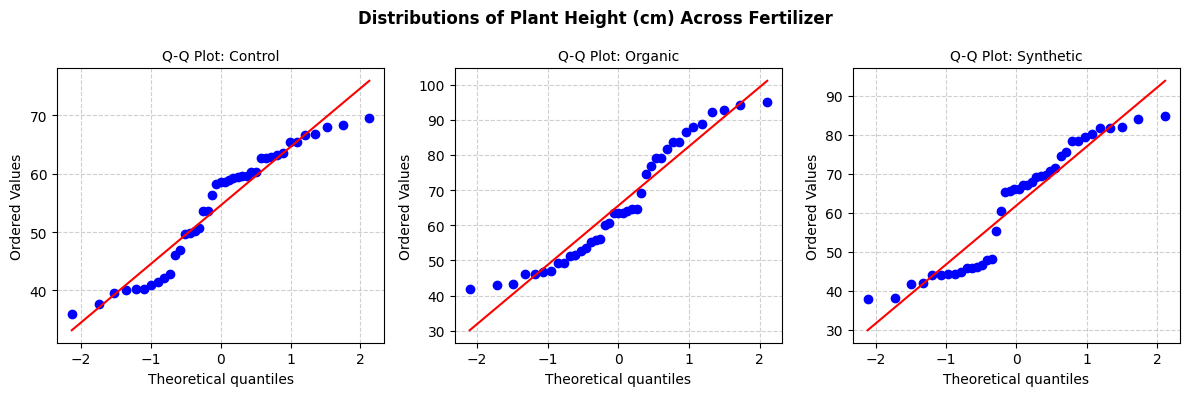

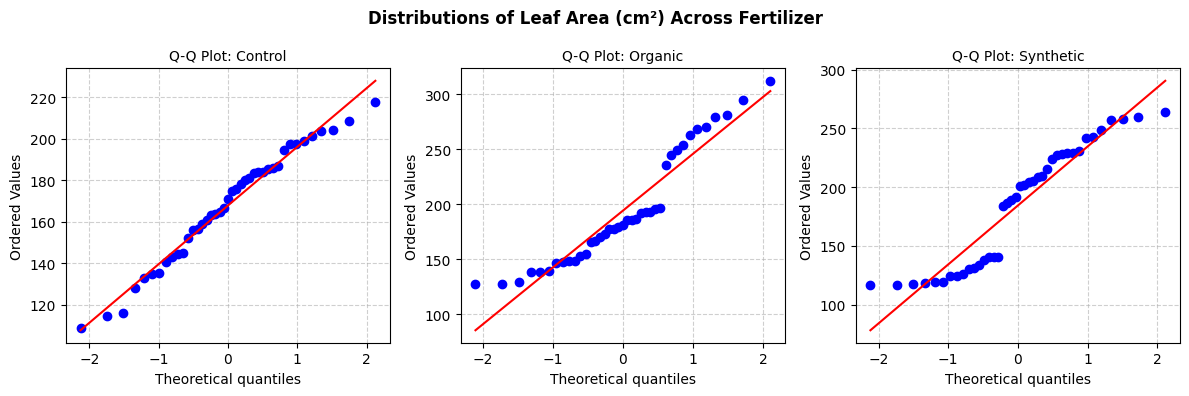

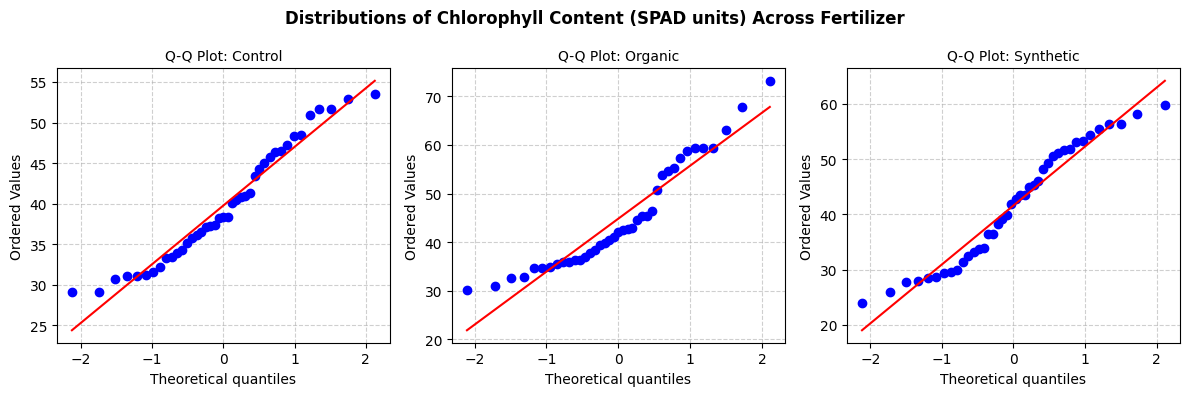

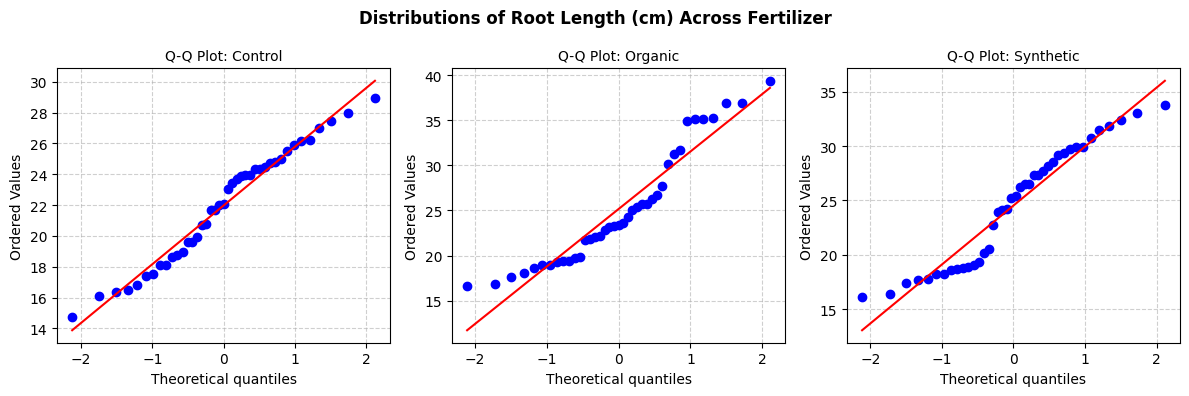

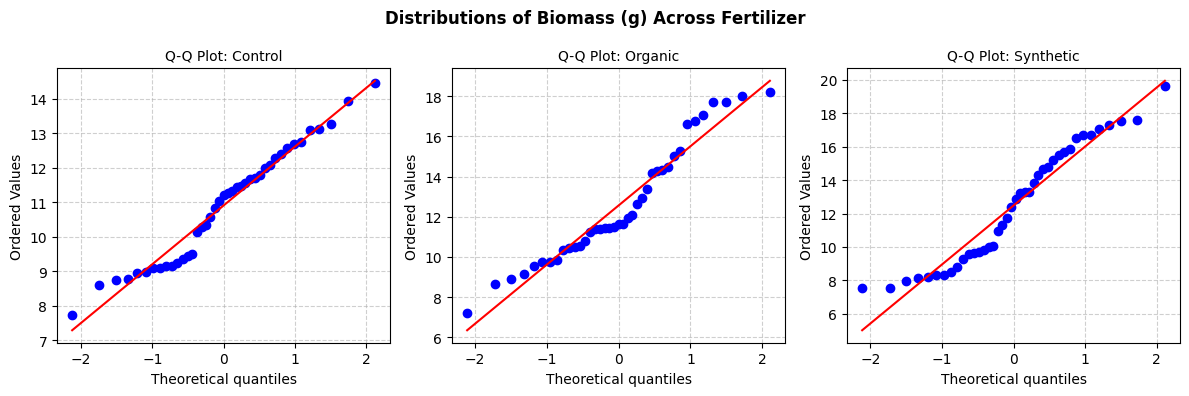

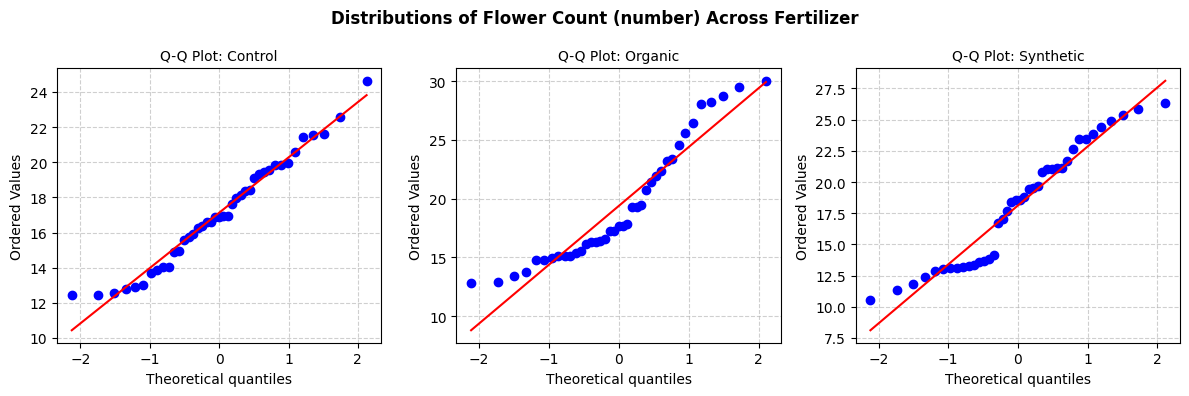

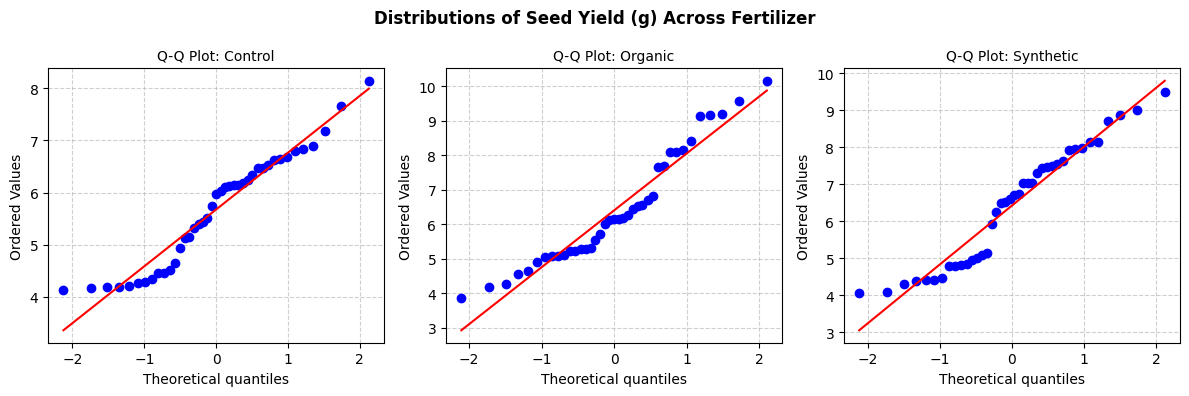

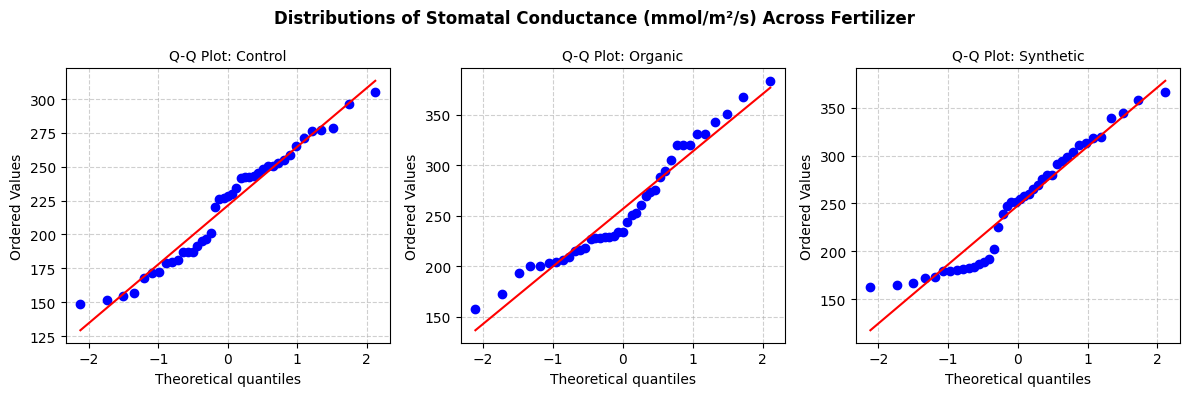

In [20]:
def qqplot_groups(data, group_col, value_col, ncols=3):
    groups = data[group_col].unique()
    n_groups = len(groups)
    nrows = int(np.ceil(n_groups / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows))
    fig.suptitle(f'Distributions of {value_col} Across {group_col}', fontsize=12, fontweight='bold')
    axes = np.array(axes).reshape(-1)  # Flatten for easy indexing

    for idx, group in enumerate(groups):
        ax = axes[idx]
        group_data = data[data[group_col] == group][value_col].dropna()
        stats.probplot(group_data, dist="norm", plot=ax)
        ax.set_title(f'Q-Q Plot: {group}', fontsize=10)
        ax.grid(linestyle='--', alpha=0.6)

    # Hide any unused subplots
    for ax in axes[n_groups:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


numerical_columns = df.select_dtypes(include=['number']).columns
for variable in numerical_columns:
    qqplot_groups(df, group_col='Fertilizer', value_col=variable, ncols=3)

<h2 style='font-size: 20px; font-weight: 600'>6.0: Analysis of Varience (One Way ANOVA)</h2>

In [25]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import re

def rename(text): return re.sub(r'[^a-zA-Z]', "", text)

def compute_one_way_anova(df, numerical_columns, group_cols):
    results = []
    original_group_cols = group_cols[:]
    group_cols = [rename(col) for col in group_cols]
    df = df.rename(columns={col: rename(col) for col in df.columns})
    
    for original_group, group in zip(original_group_cols, group_cols):
        for col in numerical_columns:
            column_name = rename(col)  
            formula = f"{column_name} ~ C({group})" 
            model = smf.ols(formula, data=df).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            
            for source, row in anova_table.iterrows():
                p_value = row["PR(>F)"]
                interpretation = "Significant" if p_value < 0.05 else "No significant"
                if source == "Residual": interpretation = "-"
                
                results.append({
                    "Group": original_group,
                    "Variable": col,
                    "Source": source,
                    "Sum Sq": row["sum_sq"],
                    "df": row["df"],
                    "F-Value": row["F"],
                    "p-Value": p_value,
                    "Significant (α<0.05)": interpretation
                })
    results = pd.DataFrame(results)
    return results.fillna(' ')

if __name__ == "__main__":
    group_columns = ['Fertilizer', 'Light Exposure'] 
    numerical_vars = df.select_dtypes(include=[np.number]).columns.tolist()
    anova_results = compute_one_way_anova(df, numerical_vars, group_columns)
    display(anova_results)

,Group,Variable,Source,Sum Sq,df,F-Value,p-Value,Significant (α<0.05)
0,Fertilizer,Plant Height (cm),C(Fertilizer),2540.40,2.00,6.20,0.00,Significant
1,Fertilizer,Plant Height (cm),Residual,23984.47,117.00,,,-
2,Fertilizer,Leaf Area (cm²),C(Fertilizer),14394.90,2.00,3.56,0.03,Significant
3,Fertilizer,Leaf Area (cm²),Residual,236693.54,117.00,,,-
4,Fertilizer,Chlorophyll Content (SPAD units),C(Fertilizer),529.81,2.00,2.81,0.06,No significant
5,Fertilizer,Chlorophyll Content (SPAD units),Residual,11047.89,117.00,,,-
6,Fertilizer,Root Length (cm),C(Fertilizer),229.57,2.00,4.09,0.02,Significant
7,Fertilizer,Root Length (cm),Residual,3286.71,117.00,,,-
8,Fertilizer,Biomass (g),C(Fertilizer),70.05,2.00,4.45,0.01,Significant
9,Fertilizer,Biomass (g),Residual,921.36,117.00,,,-


<h2 style='font-size: 20px; font-weight: 600'>6.0: Analysis of Varience (Two Way ANOVA)</h2>

In [26]:
import re
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm


def clean_column_name(name): return re.sub(r'[^a-zA-Z]', '', name)

def compute_two_way_anova(df, numeric_vars, group1, group2):
    results = []

    df = df.rename(columns={col: clean_column_name(col) for col in df.columns})
    group1_clean = clean_column_name(group1)
    group2_clean = clean_column_name(group2)

    for var in numeric_vars:
        var_clean = clean_column_name(var)
        formula = f"{var_clean} ~ C({group1_clean}) * C({group2_clean})"

        try:
            model = smf.ols(formula, data=df).fit()
            anova_table = anova_lm(model, typ=2)
            for source, row in anova_table.iterrows():
                p_val = row["PR(>F)"]
                interpretation = "Significant" if p_val < 0.05 else "Not Significant"
                if source == "Residual":
                    interpretation = "-"

                results.append({
                    "Variable": var,
                    "Source": source,
                    "Sum Sq": row["sum_sq"],
                    "df": row["df"],
                    "F-Value": row["F"],
                    "p-Value": p_val,
                    "Significant (α<0.05)": interpretation
                })
        
        except Exception as e:
            print(f"ANOVA failed for variable '{var}': {e}")
    results = pd.DataFrame(results)
    return results.fillna(' ')

if __name__ == "__main__":
    numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
    anova_results = compute_two_way_anova(df, numeric_vars, group1 = 'Fertilizer', group2='Light Exposure')
    display(anova_results)


,Variable,Source,Sum Sq,df,F-Value,p-Value,Significant (α<0.05)
0,Plant Height (cm),C(Fertilizer),3092.83,2.00,48.50,0.00,Significant
1,Plant Height (cm),C(LightExposure),18697.92,2.00,293.22,0.00,Significant
2,Plant Height (cm),C(Fertilizer):C(LightExposure),1747.48,4.00,13.70,0.00,Significant
3,Plant Height (cm),Residual,3539.06,111.00,,,-
4,Leaf Area (cm²),C(Fertilizer),19516.70,2.00,35.59,0.00,Significant
5,Leaf Area (cm²),C(LightExposure),177708.34,2.00,324.08,0.00,Significant
6,Leaf Area (cm²),C(Fertilizer):C(LightExposure),28551.54,4.00,26.03,0.00,Significant
7,Leaf Area (cm²),Residual,30433.66,111.00,,,-
8,Chlorophyll Content (SPAD units),C(Fertilizer),772.91,2.00,18.86,0.00,Significant
9,Chlorophyll Content (SPAD units),C(LightExposure),7926.07,2.00,193.36,0.00,Significant
